# **Bioinformatics Project - Computational Drug Discovery [Part 1] Download Bioactivity Data**

**MOUNSIF EL ATOUCH**


In this Jupyter notebook, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 1**, we will be performing Data Collection and Pre-Processing from the ChEMBL Database.


## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


In [2]:
! pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing libraries**

In [39]:
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
from chembl_webresource_client.new_client import new_client #provides a client interface to the ChEMBL database of bioactive molecules
import warnings #ignore warnings
warnings.filterwarnings('ignore')
import missingno as msno #visualizing missing data in datasets
import numpy as np #linear algebra
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

## **Search for Target protein**

### **Target search for "urease"**

In [4]:
target = new_client.target
target_query = target.search('urease')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P07374', 'xref_name': None, 'xre...",Canavalia ensiformis,Urease,21.0,False,CHEMBL4161,"[{'accession': 'P07374', 'component_descriptio...",SINGLE PROTEIN,3823
1,[],Bacteria,Bacterial urease,19.0,True,CHEMBL2364683,"[{'accession': 'Q03282', 'component_descriptio...",PROTEIN COMPLEX,2
2,"[{'xref_id': 'Q0PXQ5', 'xref_name': None, 'xre...",Helicobacter pylori,Urease,18.0,False,CHEMBL5325,"[{'accession': 'Q0PXQ5', 'component_descriptio...",SINGLE PROTEIN,210
3,[],Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,18.0,False,CHEMBL3885651,"[{'accession': 'P69996', 'component_descriptio...",PROTEIN COMPLEX,85962


### **Select and retrieve bioactivity data for *Helicobacter pylori (strain ATCC 700392 / 26695) (Campylobacterpylori)* (fourth entry)**

We will assign the fourth entry (which corresponds to the target protein, *Helicobacter pylori (strain ATCC 700392 / 26695) (Campylobacterpylori)*) to the ***selected_target*** variable 

In [5]:
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL3885651'

Here, we will retrieve only bioactivity data for *Helicobacter pylori (strain ATCC 700392 / 26695) (Campylobacterpylori)* (CHEMBL3885651) that are reported as pChEMBL values.

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
df1 = pd.DataFrame.from_dict(res)

In [8]:
df1

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1944249,[],CHEMBL893889,Inhibition of Helicobacter pylori ATCC 43504 u...,B,None,None,BAO_0000190,BAO_0000019,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,mM,UO_0000065,None,0.03
1,None,1944250,[],CHEMBL893889,Inhibition of Helicobacter pylori ATCC 43504 u...,B,None,None,BAO_0000190,BAO_0000019,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,mM,UO_0000065,None,0.017
2,None,1944251,[],CHEMBL893889,Inhibition of Helicobacter pylori ATCC 43504 u...,B,None,None,BAO_0000190,BAO_0000019,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,mM,UO_0000065,None,0.14
3,None,1944874,[],CHEMBL893890,Inhibition of Helicobacter pylori ATCC 43504 u...,B,None,None,BAO_0000190,BAO_0000019,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,mM,UO_0000065,None,1.48
4,None,1944876,[],CHEMBL893891,Inhibition of Helicobacter pylori ATCC 43504 u...,B,None,None,BAO_0000190,BAO_0000019,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,mM,UO_0000065,None,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,None,19445670,[],CHEMBL4432507,Inhibition of urease in Helicobacter pylori J9...,B,None,None,BAO_0000190,BAO_0000223,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,uM,UO_0000065,None,83.5
500,None,19445671,[],CHEMBL4432507,Inhibition of urease in Helicobacter pylori J9...,B,None,None,BAO_0000190,BAO_0000223,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,uM,UO_0000065,None,11.8
501,Not Active,19445672,[],CHEMBL4432507,Inhibition of urease in Helicobacter pylori J9...,B,None,None,BAO_0000190,BAO_0000223,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,None,None,None,None
502,Not Active,19445673,[],CHEMBL4432507,Inhibition of urease in Helicobacter pylori J9...,B,None,None,BAO_0000190,BAO_0000223,...,Helicobacter pylori (strain ATCC 700392 / 2669...,Urease subunit alpha/Urease subunit beta,85962,None,None,IC50,None,None,None,None


## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id, canonical_smiles, standard_value = IC50) and bioactivity_class into a DataFrame**

In [9]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df2 = df1[selection]

### **Handling missing data**

<Axes: >

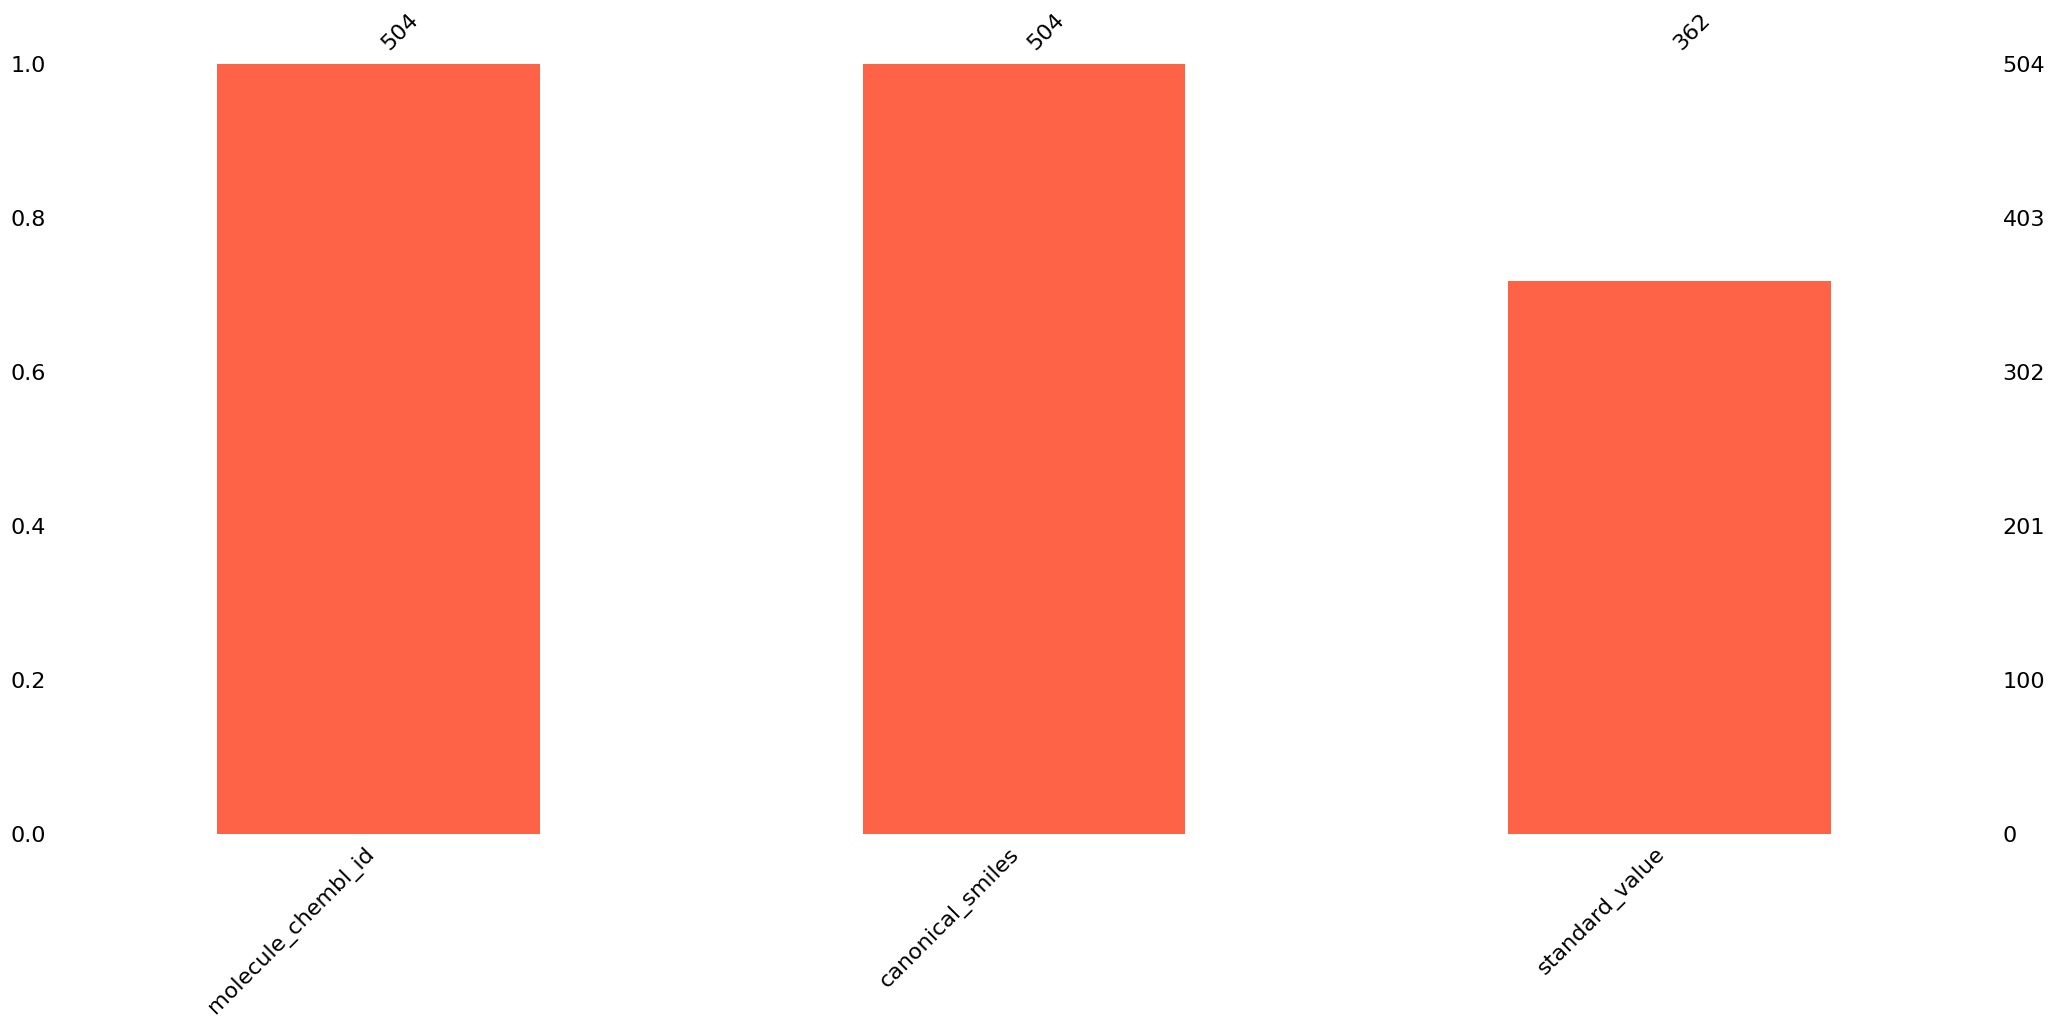

In [10]:
msno.bar(df2, color="tomato")

Save data containing compounds with missing value for the **standard_value** 

In [11]:
df2[df2.standard_value.isna()].to_csv('bioactivity_data_raw_with_no_standard_value.csv', index=False)

If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it

In [12]:
df3 = df2[df2.standard_value.notna()][df2.canonical_smiles.notna()]

### **Remove duplicates**
Drop duplicate molecules based on their canonical SMILES representation

In [13]:
df4 = df3.drop_duplicates(['canonical_smiles'])

Saves dataframe to CSV file

In [14]:
df4.to_csv('bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active or inactive**
The bioactivity data is in the IC50 unit. Compounds having values of <= 1000 nM will be considered to be **active** while those > 1000 nM will be considered to be **inactive**. 

In [15]:
df5 = pd.read_csv('bioactivity_data_preprocessed.csv')

In [36]:
bioactivity_threshold = []
for i in df5.standard_value:
  if float(i) > 1000:
    bioactivity_threshold.append("inactive")
  else:
    bioactivity_threshold.append("active")

In [37]:
bioactivity_class = pd.Series(bioactivity_threshold, name='target')
df6 = pd.concat([df5, bioactivity_class], axis=1)

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

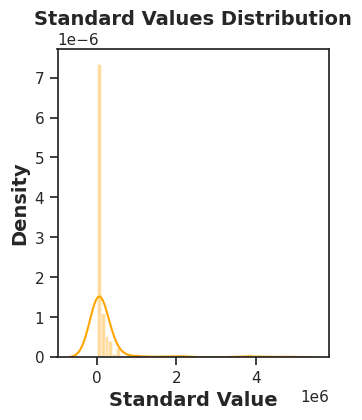

In [53]:
plt.figure(figsize=(3.5, 4))
sns.distplot(df6['standard_value'], color='orange', label='Standard Value')

plt.title('Standard Values Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Standard Value', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

plt.savefig('plot_standard_value_distribution.pdf')

In [27]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) #converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [19]:
-np.log10( (10**-9)* 100000000 ), -np.log10( (10**-9)* 10000000000 )

(1.0, -1.0)

In [28]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [29]:
df7 = norm_value(df6)

In [30]:
df_final = pIC50(df7)

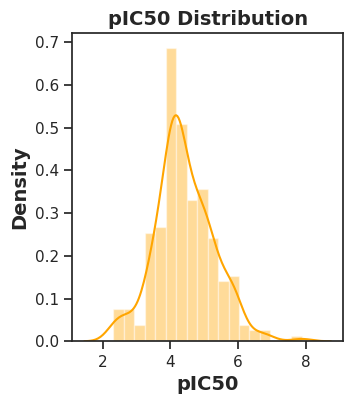

In [54]:
plt.figure(figsize=(3.5, 4))
sns.distplot(df_final['pIC50'], color='orange', label='pIC50')

plt.title('pIC50 Distribution', fontsize=14, fontweight='bold')
plt.xlabel('pIC50', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

plt.savefig('plot_pIC50_distribution.pdf')

In [31]:
df_final

,molecule_chembl_id,canonical_smiles,target,pIC50
0,CHEMBL243822,Oc1ccc(CCc2ccc(O)c(O)c2O)cc1,inactive,4.522879
1,CHEMBL734,CC(=O)NO,inactive,4.769551
2,CHEMBL242739,O=c1c(-c2ccc(O)cc2)coc2c(O)c(O)ccc12,inactive,3.853872
3,CHEMBL503157,N=C(Cc1ccc(O)cc1)c1ccc(O)c(O)c1,inactive,4.769551
4,CHEMBL412199,NC(Cc1ccc(O)cc1)c1ccc(O)c(O)c1O,inactive,4.327902
...,...,...,...,...
249,CHEMBL4539240,CCC(CO)NC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC(C...,inactive,3.966576
250,CHEMBL4461450,O=C(O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NC...,inactive,4.450997
251,CHEMBL4471428,COC(=O)CNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)NCC...,inactive,4.070581
252,CHEMBL4575318,COC(=O)CCCNC(=O)c1ccccc1[Se][Se]c1ccccc1C(=O)N...,inactive,4.696804


Saves dataframe to CSV file

In [32]:
df_final.to_csv('bioactivity_data_curated.csv', index=False)



---

